# ***ENSEMBLE LEARNING***

# **APA ITU ENSEMBLE LEARNING?**


---


Ensemble learning adalah sebuah pendekatan dalam machine learning yang bertujuan untuk meningkatkan kinerja model dengan cara menggabungkan beberapa model sekaligus. Ide dasarnya sederhana: satu model saja sering kali memiliki kelemahan, entah itu mudah overfitting, hasilnya tidak stabil, atau akurasinya kurang tinggi. Dengan mengombinasikan banyak model, kelemahan tersebut bisa saling menutupi sehingga prediksi menjadi lebih akurat, stabil, dan dapat diandalkan.

Dalam ensemble learning, ada dua komponen utama: base learner (model dasar) dan ensemble method (cara menggabungkannya). Base learner bisa berupa algoritma apa saja, seperti decision tree, SVM, Naive Bayes, atau KNN. Sedangkan ensemble method adalah strategi bagaimana model-model tersebut digabungkan. Ada tiga metode yang paling umum digunakan, yaitu:


1.   **Bagging** (Bootstrap Aggregating) – membuat banyak model dari data latih yang diacak, lalu menggabungkan hasilnya dengan voting atau rata-rata. Contoh paling terkenal adalah Random Forest.
2.   **IBoosting** – melatih model secara berurutan, di mana setiap model baru berusaha memperbaiki kesalahan dari model sebelumnya. Contohnya adalah AdaBoost, Gradient Boosting, dan XGBoost.
3.   **Stacking** – menggabungkan berbagai model berbeda, lalu hasil prediksi mereka dijadikan input bagi model akhir (meta-learner) yang akan mengambil keputusan.


Kelebihan ensemble learning adalah mampu meningkatkan akurasi, mengurangi variansi, dan memperbaiki generalisasi model. Namun, metode ini juga memiliki kekurangan, seperti komputasi yang lebih berat dan interpretasi yang lebih sulit dibandingkan model tunggal.

Dengan kata lain, ensemble learning bekerja berdasarkan prinsip bahwa “banyak kepala lebih baik daripada satu”, sehingga prediksi yang dihasilkan akan lebih kuat daripada mengandalkan satu model saja.

# **BAGGING CLASSIFIER WITH SVM DAN NAIVE BAYES**

**BAGGING CLASSIFIER SVM SEBELUM SMOTE**

In [13]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Baca dataset lokal (ganti sesuai nama file kamu) ===
df = pd.read_csv("iris (1).csv")

# === 2. Pisahkan fitur (X) dan target (y) ===
X = df.iloc[:, :-1]   # semua kolom kecuali terakhir
y = df.iloc[:, -1]    # kolom terakhir sebagai target

print("Kolom fitur:", X.columns.tolist())
print("Kolom target:", y.name)

# === 3. Split train-test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === 4. Bagging SVM sebelum SMOTE ===
clf_no_smote = BaggingClassifier(
    estimator=SVC(),
    n_estimators=50,
    random_state=0
)
clf_no_smote.fit(X_train, y_train)
y_pred_no = clf_no_smote.predict(X_test)

print("\n=== HASIL SEBELUM SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred_no))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no))
print("Classification Report:\n", classification_report(y_test, y_pred_no))

Kolom fitur: ['COL 1', 'COL 2', 'COL 3', 'COL 4']
Kolom target: COL 5

=== HASIL SEBELUM SMOTE ===
Akurasi: 0.9714285714285714
Confusion Matrix:
 [[ 5  0  0]
 [ 0 14  1]
 [ 0  0 15]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.97        35
      macro avg       0.98      0.98      0.98        35
   weighted avg       0.97      0.97      0.97        35



**BAGGING CLASSIFIER SVM SESUDAH SMOTE**

In [14]:
# === 5. Terapkan SMOTE ===
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# === 6. Bagging SVM sesudah SMOTE ===
clf_smote = BaggingClassifier(
    estimator=SVC(),
    n_estimators=50,
    random_state=0
)
clf_smote.fit(X_train_sm, y_train_sm)
y_pred_sm = clf_smote.predict(X_test)

print("\n=== HASIL SESUDAH SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sm))
print("Classification Report:\n", classification_report(y_test, y_pred_sm))



=== HASIL SESUDAH SMOTE ===
Akurasi: 0.9714285714285714
Confusion Matrix:
 [[ 5  0  0]
 [ 0 14  1]
 [ 0  0 15]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.97        35
      macro avg       0.98      0.98      0.98        35
   weighted avg       0.97      0.97      0.97        35



**Visualisasi distribusi kelas sebelum & sesudah SMOTE**

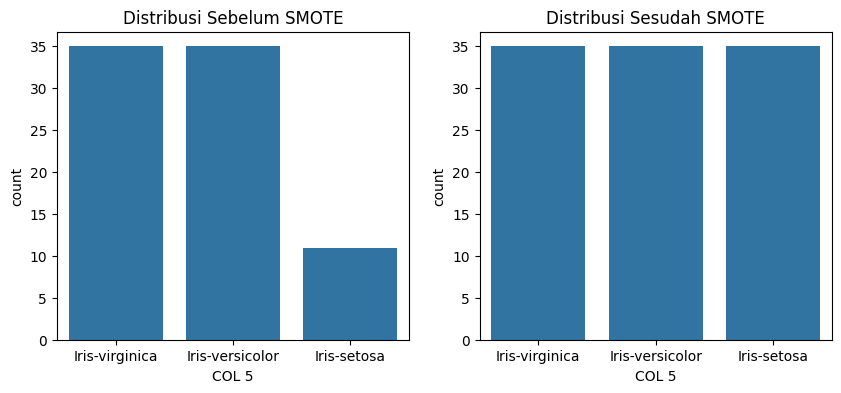

In [15]:
# === 7. Visualisasi distribusi kelas sebelum & sesudah SMOTE ===
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x=y_train)
plt.title("Distribusi Sebelum SMOTE")

plt.subplot(1,2,2)
sns.countplot(x=y_train_sm)
plt.title("Distribusi Sesudah SMOTE")

plt.show()

**BAGGING CLASSIFIER NAIVE BAYES SEBELUM DI SMOTE**

In [17]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Baca dataset lokal (ganti sesuai nama file kamu) ===
df = pd.read_csv("iris (1).csv")

# === 2. Pisahkan fitur (X) dan target (y) ===
X = df.iloc[:, :-1]   # semua kolom kecuali terakhir
y = df.iloc[:, -1]    # kolom terakhir sebagai target

print("Kolom fitur:", X.columns.tolist())
print("Kolom target:", y.name)

# === 3. Split train-test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === 4. Bagging Naive Bayes sebelum SMOTE ===
clf_no_smote = BaggingClassifier(
    estimator=GaussianNB(),
    n_estimators=50,
    random_state=0
)
clf_no_smote.fit(X_train, y_train)
y_pred_no = clf_no_smote.predict(X_test)

print("\n=== HASIL BAGGING NAIVE BAYES SEBELUM SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred_no))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no))
print("Classification Report:\n", classification_report(y_test, y_pred_no))

Kolom fitur: ['COL 1', 'COL 2', 'COL 3', 'COL 4']
Kolom target: COL 5

=== HASIL BAGGING NAIVE BAYES SEBELUM SMOTE ===
Akurasi: 0.9142857142857143
Confusion Matrix:
 [[ 5  0  0]
 [ 0 13  2]
 [ 0  1 14]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.91        35
      macro avg       0.93      0.93      0.93        35
   weighted avg       0.92      0.91      0.91        35



**BAGGING CLASSIFIER NAIVE BAYES SESUDAH DI SMOTE**

In [18]:
# === 5. Terapkan SMOTE ===
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# === 6. Bagging Naive Bayes sesudah SMOTE ===
clf_smote = BaggingClassifier(
    estimator=GaussianNB(),
    n_estimators=50,
    random_state=0
)
clf_smote.fit(X_train_sm, y_train_sm)
y_pred_sm = clf_smote.predict(X_test)

print("\n=== HASIL BAGGING NAIVE BAYES SESUDAH SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sm))
print("Classification Report:\n", classification_report(y_test, y_pred_sm))


=== HASIL BAGGING NAIVE BAYES SESUDAH SMOTE ===
Akurasi: 0.9142857142857143
Confusion Matrix:
 [[ 5  0  0]
 [ 0 13  2]
 [ 0  1 14]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.91        35
      macro avg       0.93      0.93      0.93        35
   weighted avg       0.92      0.91      0.91        35



**Visualisasi distribusi kelas sebelum & sesudah SMOTE**

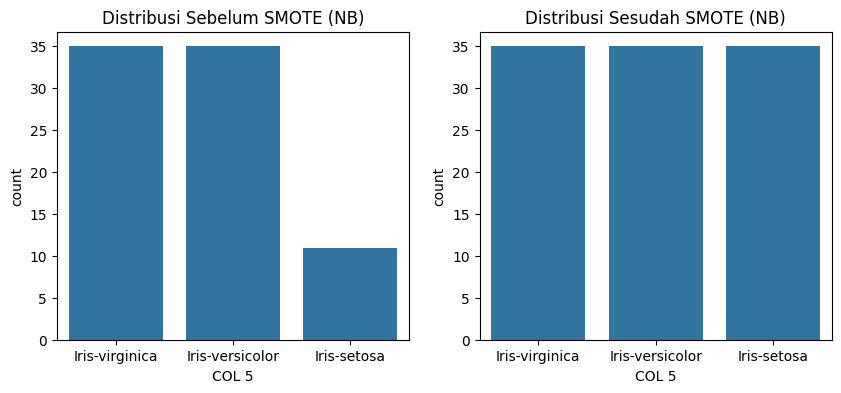

In [19]:
# === 7. Visualisasi distribusi kelas sebelum & sesudah SMOTE ===
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x=y_train)
plt.title("Distribusi Sebelum SMOTE (NB)")

plt.subplot(1,2,2)
sns.countplot(x=y_train_sm)
plt.title("Distribusi Sesudah SMOTE (NB)")

plt.show()

# **KESIMPULAN**


---


Dapat disimpulkan bahwa ensemble learning merupakan strategi penting dalam machine learning karena mampu meningkatkan performa model, mengurangi risiko kesalahan, serta memperbaiki generalisasi. Walaupun memerlukan sumber daya komputasi lebih besar dan interpretasi yang lebih kompleks, ensemble learning terbukti menjadi solusi efektif untuk menghasilkan model prediksi yang lebih optimal dan andal.